In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)


In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
cov_matrix = df.cov()
print("\nCovariance Matrix:\n", cov_matrix)



Covariance Matrix:
                           Pregnancies      Glucose  BloodPressure  \
Pregnancies                 11.354056    13.947131       9.214538   
Glucose                     13.947131  1022.248314      94.430956   
BloodPressure                9.214538    94.430956     374.647271   
SkinThickness               -4.390041    29.239183      64.029396   
Insulin                    -28.555231  1220.935799     198.378412   
BMI                          0.469774    55.726987      43.004695   
DiabetesPedigreeFunction    -0.037426     1.454875       0.264638   
Age                         21.570620    99.082805      54.523453   
Outcome                      0.356618     7.115079       0.600697   

                          SkinThickness       Insulin         BMI  \
Pregnancies                   -4.390041    -28.555231    0.469774   
Glucose                       29.239183   1220.935799   55.726987   
BloodPressure                 64.029396    198.378412   43.004695   
SkinThicknes

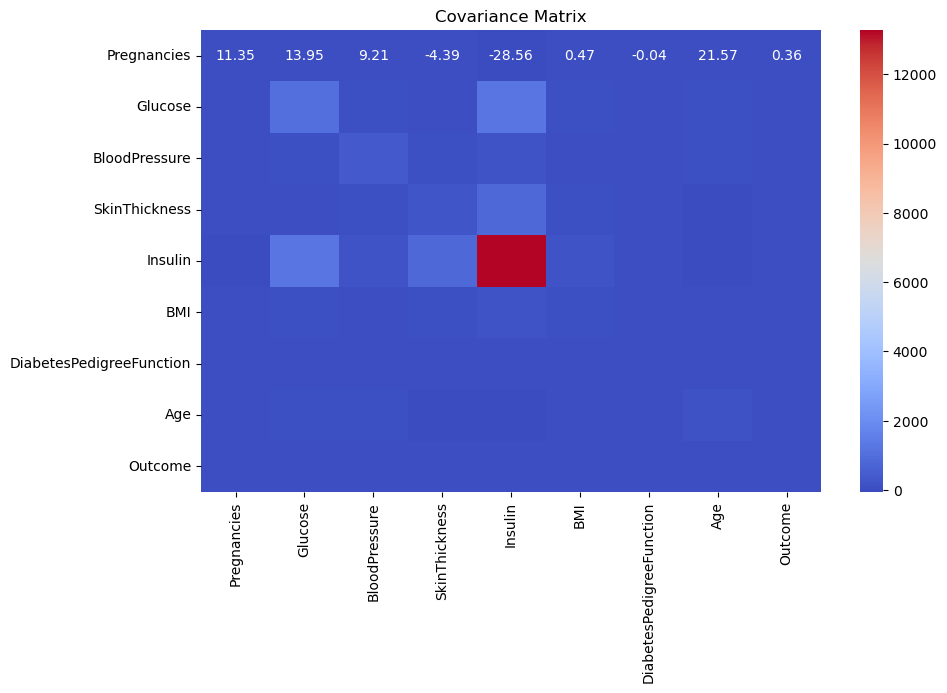

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Matrix")
plt.show()

In [7]:
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
X = df[selected_features]
y = df['Outcome']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)


In [17]:
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.77
Testing Accuracy: 0.75


In [19]:
cov_matrix_test = pd.DataFrame(X_test, columns=selected_features).cov()
print("\nCovariance Matrix (Test Set):\n", cov_matrix_test)



Covariance Matrix (Test Set):
                               Glucose        BMI         Age  Pregnancies  \
Glucose                   1012.886173  75.525923   96.708683     9.235124   
BMI                         75.525923  71.550056   15.195612    -0.458429   
Age                         96.708683  15.195612  160.913165    22.998133   
Pregnancies                  9.235124  -0.458429   22.998133    12.726297   
DiabetesPedigreeFunction     1.169442   0.462945    0.326180    -0.108460   

                          DiabetesPedigreeFunction  
Glucose                                   1.169442  
BMI                                       0.462945  
Age                                       0.326180  
Pregnancies                              -0.108460  
DiabetesPedigreeFunction                  0.095577  


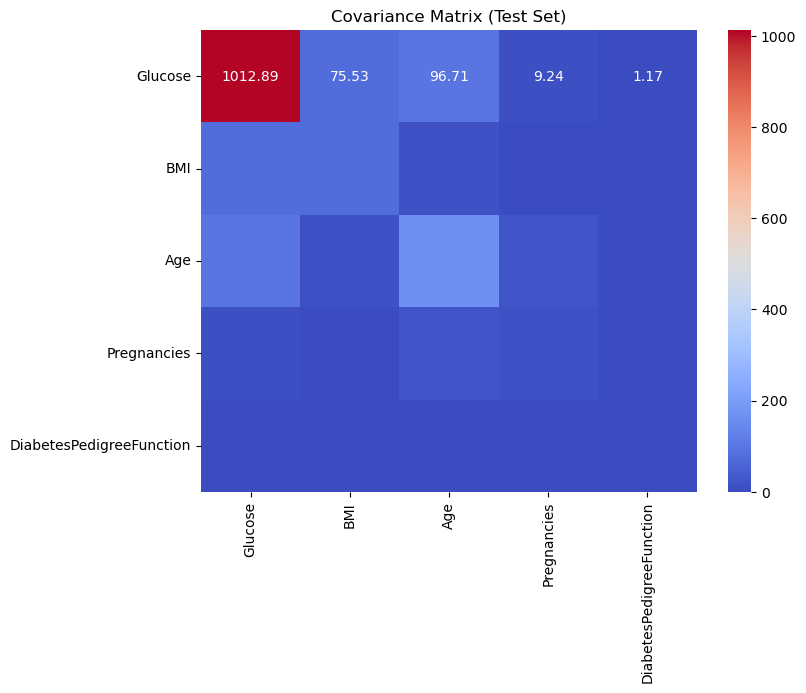

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix_test, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Matrix (Test Set)")
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

In [24]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [25]:
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)


In [27]:
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)


In [28]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.77
Testing Accuracy: 0.75


In [29]:
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")


Training Precision: 0.71
Testing Precision: 0.66
